In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

print('tensorflow version: ', tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dropout layer
model.add(layers.Dropout(0.5))

# Add fully connected layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


tensorflow version:  2.16.1
Num GPUs Available:  1


/Users/matthewdulcich/Documents/DevProjects/Machine Learning Projects/Image-Classification-Transfer-Learning/python-venv311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3252 - loss: 1.7947 - val_accuracy: 0.5452 - val_loss: 1.2756
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5352 - loss: 1.2906 - val_accuracy: 0.6169 - val_loss: 1.0847
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5965 - loss: 1.1387 - val_accuracy: 0.6551 - val_loss: 0.9884
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6339 - loss: 1.0448 - val_accuracy: 0.6645 - val_loss: 0.9521
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6632 - loss: 0.9545 - val_accuracy: 0.6778 - val_loss: 0.9340
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6769 - loss: 0.9250 - val_accuracy: 0.6942 - val_loss: 0.8597
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6906 - loss: 0.8812 - val_accuracy: 0.6917 - val_loss: 0.8879
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7041 -

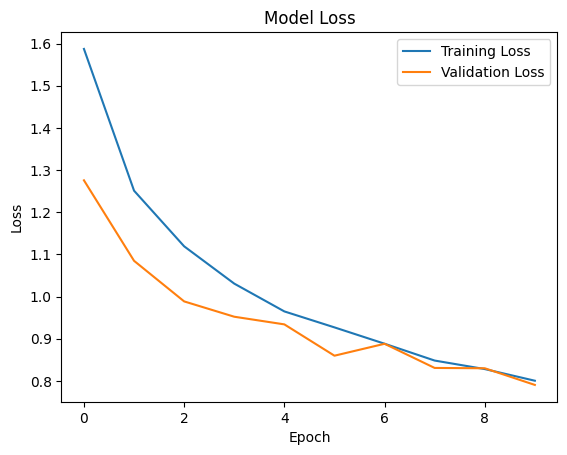

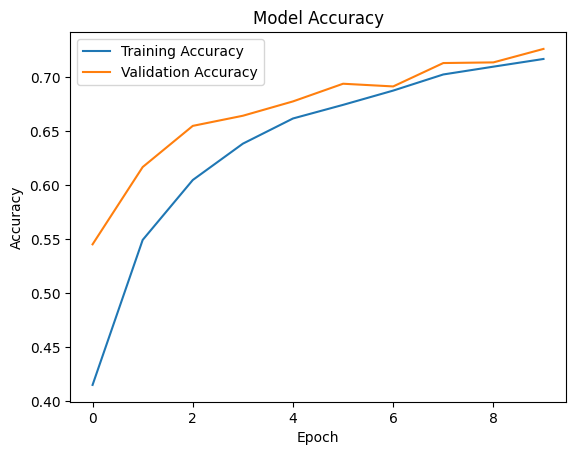

In [9]:
import matplotlib.pyplot as plt

# Get the model history
history = model.history

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Display the predicted labels
for i in range(len(test_images)):
    print(f"Image {i+1}: Predicted Label - {predicted_labels[i]}, Actual Label - {test_labels[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Image 1: Predicted Label - 3, Actual Label - [3]
Image 2: Predicted Label - 8, Actual Label - [8]
Image 3: Predicted Label - 1, Actual Label - [8]
Image 4: Predicted Label - 0, Actual Label - [0]
Image 5: Predicted Label - 6, Actual Label - [6]
Image 6: Predicted Label - 6, Actual Label - [6]
Image 7: Predicted Label - 1, Actual Label - [1]
Image 8: Predicted Label - 6, Actual Label - [6]
Image 9: Predicted Label - 5, Actual Label - [3]
Image 10: Predicted Label - 1, Actual Label - [1]
Image 11: Predicted Label - 0, Actual Label - [0]
Image 12: Predicted Label - 9, Actual Label - [9]
Image 13: Predicted Label - 7, Actual Label - [5]
Image 14: Predicted Label - 7, Actual Label - [7]
Image 15: Predicted Label - 9, Actual Label - [9]
Image 16: Predicted Label - 8, Actual Label - [8]
Image 17: Predicted Label - 5, Actual Label - [5]
Image 18: Predicted Label - 7, Actual Label - [7]
Image 19: Predicted Label - 8, Actual Label - [8]
Image 20: Predicte